# Iris Flower Classification Using Logistics Regression & KNeigbour Classifiers

**By Dajah Vincent**  

In [4]:
import pandas as pd                 #data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                  #linear algebra
import seaborn as sb
import matplotlib.pyplot as plt 


In [5]:
df = pd.read_csv("IRIS.csv")

In [6]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
df.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization

In [25]:
def converter(s):
  s = s.lower()
  if s == 'iris-setosa':
    return 0
  elif s == 'iris-versicolor':
    return 1
  elif s == 'iris-virginica':
    return 2
  else:
    return -1

In [27]:
df = pd.read_csv("IRIS.csv",converters = {"species":converter})

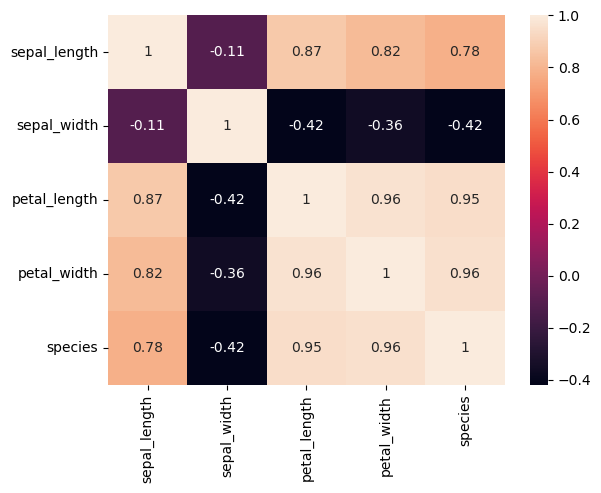

In [28]:
sb.heatmap(df.corr(), annot = True)
plt.show()

# Scatter Plot

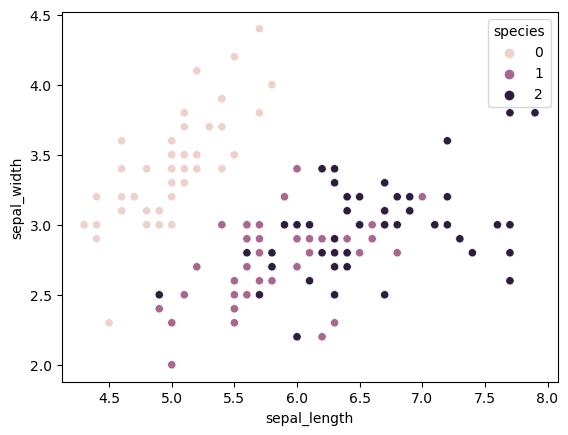

In [54]:
sb.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'species')
plt.show()

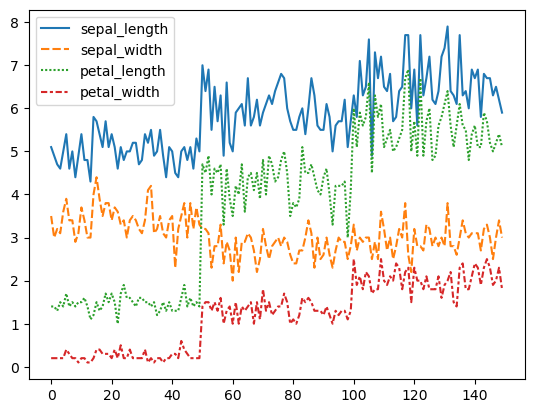

In [55]:
sb.lineplot(data = df.drop(['species'], axis=1))
plt.show()

C:\Users\DajahV01\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


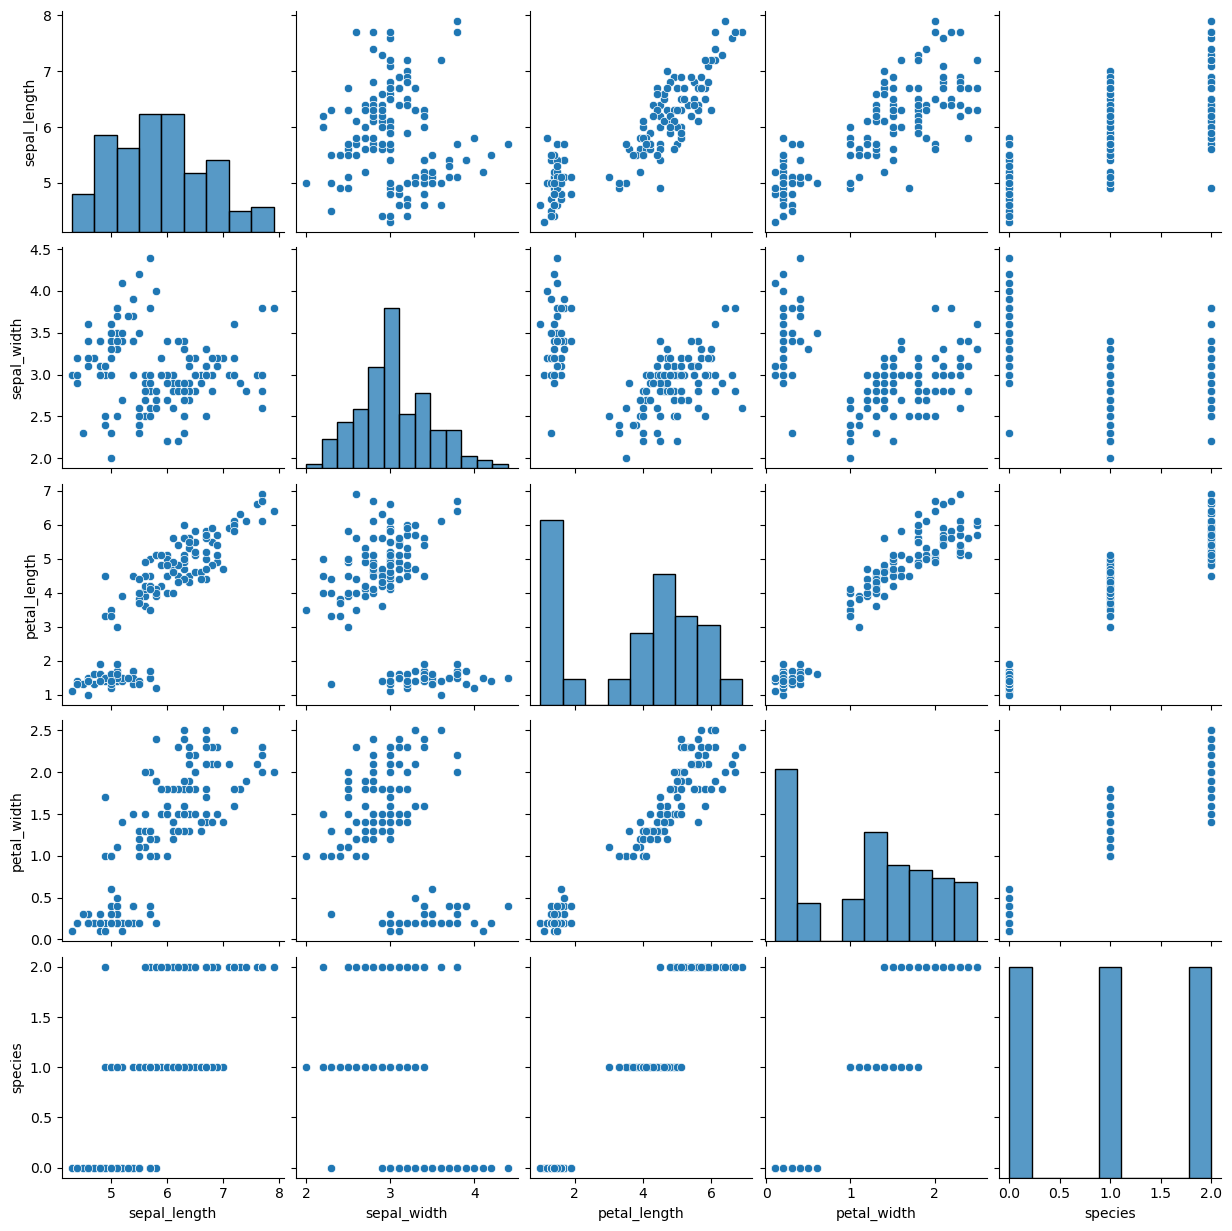

In [31]:
sb.pairplot(df)

C:\Users\DajahV01\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

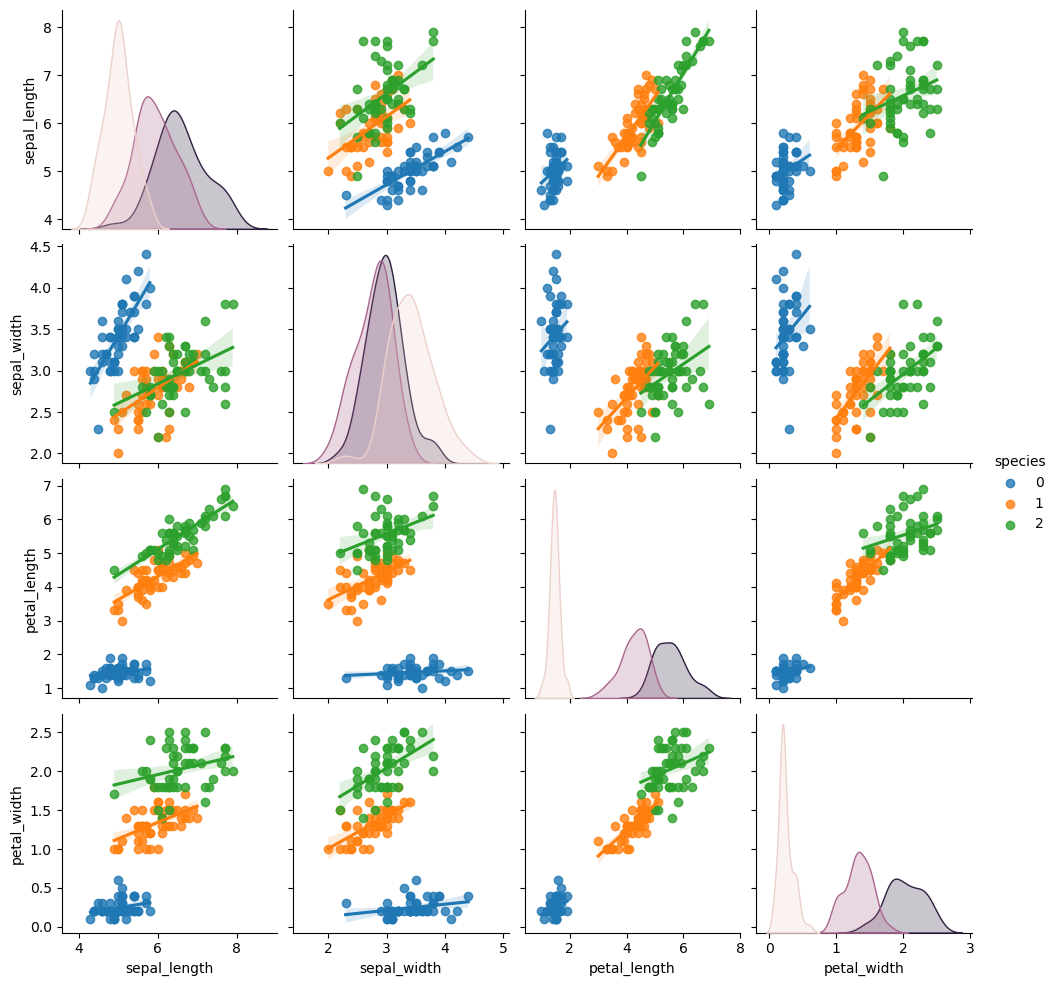

In [56]:
plt.figure(figsize=(10,5));
sb.pairplot(df,kind='reg',hue ='species' );

# Training A Classification Model

In [38]:
# Importing the model packages 

from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.linear_model import LinearRegression

# Linear Regression 

In [36]:
features = df[['sepal_length','sepal_width','petal_length','petal_width']]
labels = df["species"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25)

In [39]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
print(lm.intercept_)

0.35064515381651695


In [42]:
predictions = lm.predict(X_test)

In [43]:
print('MAE :',metrics.mean_absolute_error(y_test, predictions))
print('MSE :',metrics.mean_squared_error(y_test, predictions))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE : 0.1921808832745818
MSE : 0.06059184983222843
RMSE : 0.24615411804848691


# Logistics Regression 

In [46]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [48]:

lreg = LogisticRegression()
lreg.fit(features, labels)
labels_pred = logreg.predict(features)
metrics.accuracy_score(labels, labels_pred)

#print(metrics.accuracy_score(labels, labels_pred))

0.9733333333333334

# K Neighbors Classifier

In [49]:
# Importing the KNeigbors Classifier packaging 

from sklearn.neighbors import KNeighborsClassifier

In [50]:
kn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric='minkowski')
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

0.9210526315789473